<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-3-Assignments/blob/main/Ivan_Mihailov_DSPT11_233_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and initial EDA

In [1]:
import pandas as pd
import numpy as np

**Type of Problem:** Classification of Drought Conditions in U.S. Counties based on meteorological and soil data

In [2]:
# Ingest meteorological data from training dataset as dataframe
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/train_timeseries/train_timeseries.csv')
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [3]:
train.shape

(19300680, 21)

In [4]:
# Determine whether there are NaNs in the data and their significance (if any)
train.isna().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [5]:
train.describe() # Explore the training dataset

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [ ]:
train.head(20)

In [ ]:
train.tail(30)

In [ ]:
train['score'].value_counts() # Determine the type of values in the 'score' column

# **This Dataset is too large as presented**


*   It frequently crashes Google Colab when more computer-intensive tasks are performed;
*   The data itself is messy (daily meteorogical observations but only weekly measurements of drought)

**Conclusion:** Subset and only use one state (Pennsylvania) for Portfolio Project



In [6]:
# Define wrangling function for training, validation, and test datasets
def wrangle(df):
  
  # Isolate PA counties in the training dataset
  condition = ((df['fips'] == 42001) | (df['fips'] == 42003) | 
             (df['fips'] == 42005) | (df['fips'] == 42007) | 
             (df['fips'] == 42009) | (df['fips'] == 42011) | 
             (df['fips'] == 42013) | (df['fips'] == 42015) | 
             (df['fips'] == 42017) | (df['fips'] == 42019) | 
             (df['fips'] == 42021) | (df['fips'] == 42023) | 
             (df['fips'] == 42025) | (df['fips'] == 42027) |
             (df['fips'] == 42029)	| (df['fips'] == 42031) |
             (df['fips'] == 42033)	| (df['fips'] == 42035) |	
             (df['fips'] == 42037)	| (df['fips'] == 42039) |
             (df['fips'] == 42041)	| (df['fips'] == 42043) |
             (df['fips'] == 42045)	| (df['fips'] == 42047) |
             (df['fips'] == 42049) | (df['fips'] == 42051) |
             (df['fips'] == 42053) | (df['fips'] == 42055) |
             (df['fips'] == 42057) | (df['fips'] == 42059) |
             (df['fips'] == 42061) |	(df['fips'] == 42063) |	
             (df['fips'] == 42065) |	(df['fips'] == 42067) |
             (df['fips'] == 42069)	| (df['fips'] == 42071) |	
             (df['fips'] == 42073) |	(df['fips'] == 42075) |
             (df['fips'] == 42077) |	(df['fips'] == 42079) |
             (df['fips'] == 42081) |	(df['fips'] == 42083) |
             (df['fips'] == 42085) |	(df['fips'] == 42087) | 
             (df['fips'] == 42089) | (df['fips'] == 42091) |
             (df['fips'] == 42093)	| (df['fips'] == 42095) |
             (df['fips'] == 42097)	| (df['fips'] == 42099) |	
             (df['fips'] == 42101)	| (df['fips'] == 42103) |
             (df['fips'] == 42105)	| (df['fips'] == 42107) |
             (df['fips'] == 42109)	| (df['fips'] == 42111) |
             (df['fips'] == 42113)	| (df['fips'] == 42115) | 
             (df['fips'] == 42117) | (df['fips'] == 42119) |
             (df['fips'] == 42121) | (df['fips'] == 42123) |
             (df['fips'] == 42125)	| (df['fips'] == 42127) |
             (df['fips'] == 42129)	| (df['fips'] == 42131) |
             (df['fips'] == 42133))
  
  df = df[condition]
   
  return df

In [8]:
train_pa = wrangle(train)

In [9]:
train_pa.shape

(416070, 21)

In [10]:
# Ingest soil data as dataframe
soil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/soil_data.csv')
soil.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.4146,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.5010,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.2283,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.0037,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [11]:
soil.shape

(3109, 32)

In [ ]:
soil.isnull().sum() # No null values!

In [12]:
soil_pa = wrangle(soil)

In [ ]:
#soil_pa.drop(labels = ['lat', 'lon'], axis = 1, inplace = True) # Drop latitude and longtitude from Soil dataframe as likely useless features

In [13]:
train_pa_final = pd.merge(left=train_pa, right=soil_pa, how='left', on='fips') # Merge PA weather data with PA soil data

In [14]:
# Set date to DateTime format and use it as index

train_pa_final['date']= pd.to_datetime(train_pa_final['date'])
train_pa_final = train_pa_final.set_index('date')

In [15]:
train_pa_final.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,42001,0.00,99.76,4.06,1.22,0.73,0.73,7.14,-2.04,9.18,0.61,2.14,3.25,0.99,2.26,3.78,6.96,1.43,5.53,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-02,42001,0.18,99.41,5.71,5.02,5.27,5.27,9.35,1.20,8.16,4.56,3.42,4.50,2.52,1.98,6.15,9.00,3.75,5.25,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-03,42001,0.37,99.20,7.49,9.46,9.44,9.44,13.50,6.32,7.18,8.88,3.11,4.93,1.89,3.05,5.95,8.87,2.24,6.63,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-04,42001,8.25,98.29,7.68,10.13,9.17,9.18,14.81,1.72,13.09,9.54,5.51,7.29,4.55,2.74,8.98,11.08,7.45,3.63,0.0,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-05,42001,0.34,99.78,2.67,-0.32,-4.76,-4.69,3.43,-3.22,6.64,-0.86,4.52,7.04,1.16,5.88,7.08,9.72,1.78,7.94,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1


In [16]:
train_pa_final.shape

(416070, 51)

**Target Column:** 'score' because that is where the drought condition is recorded

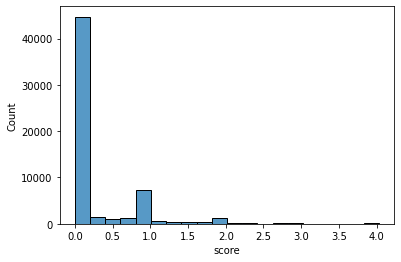

In [17]:
import seaborn as sns

sns.histplot(train_pa_final['score'], bins=20)

Upon further review, this could be treated as a regression or a classification problem. I plan on treating it as a classification problem with the following categories:

*   'None' (score == 0.0)
*   'Abnormal (D0)' (0.0 < score <= 1.0)
*   'Moderate (D1)' (1.0 < score <= 2.0)
*   'Severe (D2)' (2.0 < score <= 3.0)
*   'Extreme (D3)' (3.0 < score <= 4.0)
*   'Exceptional (D4)' (4.0 < score <= 5.0)

Before updating the classification values, the NaNs in the 'score' columns will need to be imputed. This is due to the fact that the meteorogical data is recorded every day but the drought data is recorded every week.



**Evaluation metric:**
Because the majority class frequency is much lower than 50%, accuracy will not be a good evaluation metric as it could be misleading. 
I plan to rely on ROCAUC as the evaluation metric and, in addition, plan to plot the confusion matrix and calculate the precision/recall for the different drought categories.

**Train/Validate/Test**

The split is time-based and was created by the Kaggle dataset author. The split is as follows:

Train: Jan. 1, 2000 to Dec. 31, 2016
Val: Jan. 1, 2017 to Dec. 31, 2018
Test: Jan. 1, 2019 to Dec. 31, 2020

In [18]:
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/validation_timeseries/validation_timeseries.csv')
val.shape

(2268840, 21)

In [19]:
val_pa = wrangle(val) # Apply wrangle function to isolate Pennsylvania observations in the validation dataset

In [20]:
val_pa_final = pd.merge(left=val_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [21]:
# Set date to DateTime format and use it as index

val_pa_final['date']= pd.to_datetime(val_pa_final['date'])
val_pa_final = val_pa_final.set_index('date')

In [22]:
val_pa_final.shape

(48910, 51)

In [23]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/test_timeseries/test_timeseries.csv')
test.shape

(2271948, 21)

In [24]:
test_pa = wrangle(test) # Apply wrangle function to isolate Pennsylvania observations in the test dataset

In [25]:
test_pa_final = pd.merge(left=test_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [26]:
# Set date to DateTime format and use it as index

test_pa_final['date']= pd.to_datetime(test_pa_final['date'])
test_pa_final = test_pa_final.set_index('date')

In [27]:
test_pa_final.shape

(48977, 51)

In [28]:
# Define function to fill the NaNs in the target vector using the interpolate method (with default options for linear interpolation)

def target_interpolate(y):
  y = y.interpolate(inplace = True)

  return y

In [29]:
target = 'score'
y_train = train_pa_final[target] # Create target vector for training dataset
y_val = val_pa_final[target] # Create target vector for validation dataset
y_test = test_pa_final[target] # Create target vector for test dataset

In [30]:
target_interpolate(y_train) # Apply target_interpolate function to training dataset

In [31]:
target_interpolate(y_val) # Apply target_interpolate function to validation dataset
target_interpolate(y_test) # Apply target_interpolate function to test dataset

In [36]:
pd.set_option("display.max_rows", 500000)

In [32]:
# Manually replace first 3 NaN values in y_train (because those values were not interpolated by target_interpolate function)
for i in range(0, 3):
  y_train[i] = y_train[3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Manually replace first 2 NaN values in y_val (because those values were not interpolated by target_interpolate function)
for i in range(0, 2):
  y_val[i] = y_val[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
X_train = train_pa_final.drop(columns = target) # Create feature matrix for training dataset
X_val = val_pa_final.drop(columns = target) # Create feature matrix for validation dataset
X_test = test_pa_final.drop(columns = target) # Create feature matrix for training dataset

# Set up problem as a Regression problem using Random Forest Regressor

In [40]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score, r2_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = r2_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: -0.2464039003325238


In [41]:
# Set up Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, max_depth = 10, random_state = 42)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.1875559885378114
Validation score is: -0.015604862604430279


# Set up problem as a Classification problem using Random Forest Classifier

In [35]:
# Function to change target vector float values to drought categories

def drought_cat(y):
  none = (y == 0.0)
  abnormal = (y > 0.0) & (y <= 1.0)
  moderate = (y > 1.0) & (y <= 2.0)
  severe = (y > 2.0) & (y <= 3.0)
  extreme = (y > 3.0) & (y <= 4.0)
  exceptional = (y > 4.0) & (y <= 5.0)

  y.loc[none] = 'none'
  y.loc[abnormal] = 'abnormal'
  y.loc[moderate] = 'moderate'
  y.loc[severe] = 'severe'
  y.loc[extreme] = 'extreme'
  y.loc[exceptional] = 'exceptional'

  return y

In [36]:
drought_cat(y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2000-01-01        none
2000-01-02        none
2000-01-03        none
2000-01-04        none
2000-01-05        none
                ...   
2016-12-27    moderate
2016-12-28    moderate
2016-12-29    moderate
2016-12-30    moderate
2016-12-31    moderate
Name: score, Length: 416070, dtype: object

In [37]:
drought_cat(y_val)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2017-01-01    moderate
2017-01-02    moderate
2017-01-03    moderate
2017-01-04    moderate
2017-01-05    moderate
                ...   
2018-12-27        none
2018-12-28        none
2018-12-29        none
2018-12-30        none
2018-12-31        none
Name: score, Length: 48910, dtype: object

In [38]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = accuracy_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.6791885980724397


In [41]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_20t = RandomForestClassifier(n_jobs = -1, max_depth = 20, random_state = 42)

model_20t.fit(X_train, y_train)

print('Training score is:', model_20t.score(X_train, y_train))
print('Validation score is:', model_20t.score(X_val, y_val))

Training score is: 0.8513038671377412
Validation score is: 0.7647515845430383


In [61]:
y_train.value_counts(normalize = True)

none           0.679189
abnormal       0.252265
moderate       0.054366
severe         0.010392
extreme        0.003776
exceptional    0.000012
Name: score, dtype: float64

In [64]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 15, 
    class_weight= {'none' : 1, 'abnormal' : 2.72, 
                   'moderate' : 13.6, 'severe' : 68, 'extreme' : 136, 
                   'exceptional' : 136},
    random_state = 42
)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

# Using class_weight=>much worse performance

Training score is: 0.6803422501021463
Validation score is: 0.4905745246370885


In [65]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 15, 
    random_state = 42
)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.7412839185713942
Validation score is: 0.7709875281128603


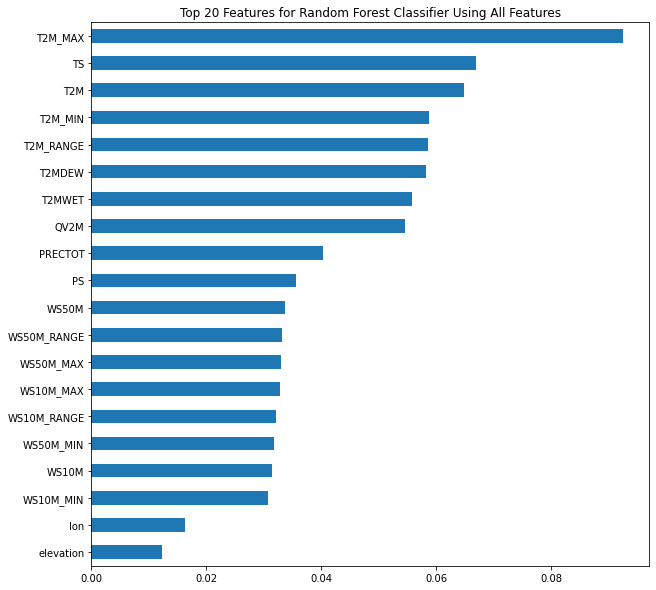

In [40]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, X_train.columns)

n =20
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} Features for Random Forest Classifier Using All Features')
importances.sort_values()[-n:].plot.barh()

In [45]:
#y_test = test_pa_final[target] # Create target vector for test dataset
y_test

date
2019-01-01    0.000000
2019-01-02    0.000000
2019-01-03    0.000000
2019-01-04    0.000000
2019-01-05    0.000000
                ...   
2020-12-27    0.525986
2020-12-28    0.408343
2020-12-29    0.290700
2020-12-30    0.290700
2020-12-31    0.290700
Name: score, Length: 48977, dtype: float64

In [44]:
target_interpolate(y_test) # Apply target_interpolate function to test dataset

In [46]:
drought_cat(y_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2019-01-01        none
2019-01-02        none
2019-01-03        none
2019-01-04        none
2019-01-05        none
                ...   
2020-12-27    abnormal
2020-12-28    abnormal
2020-12-29    abnormal
2020-12-30    abnormal
2020-12-31    abnormal
Name: score, Length: 48977, dtype: object

In [47]:
print('Test score is:', model.score(X_test, y_test))

Test score is: 0.745023174142965


# Permutation of Best Feature from Random Forest Model

In [48]:
perm_feature = 'T2M_MAX'
X_val[perm_feature].head(10)

date
2017-01-01    7.92
2017-01-02    3.24
2017-01-03    4.16
2017-01-04    8.41
2017-01-05   -1.55
2017-01-06   -2.75
2017-01-07   -5.34
2017-01-08   -7.32
2017-01-09   -4.95
2017-01-10    0.69
Name: T2M_MAX, dtype: float64

In [49]:
# Permute the valuation dataset with the T2M_MAX feature
X_val_permuted = X_val.copy()
X_val_permuted[perm_feature] = np.random.permutation(X_val[perm_feature])

In [50]:
X_val_permuted[perm_feature].head(10) # Verify permutation result

date
2017-01-01     4.21
2017-01-02     9.32
2017-01-03    20.66
2017-01-04    10.95
2017-01-05     2.54
2017-01-06    27.74
2017-01-07    20.93
2017-01-08    29.29
2017-01-09    -0.98
2017-01-10    13.02
Name: T2M_MAX, dtype: float64

In [51]:
# Calculate the score with the permutated feature to determine its true importance

score_permuted= model.score(X_val_permuted, y_val)

print(f'Validation Score with {perm_feature}:{model.score(X_val, y_val)}')
print(f'Validation Score with {perm_feature} permuted:{score_permuted}')
print(f'Importance of {perm_feature}:{(model.score(X_val, y_val)) - score_permuted}')

Validation Score with T2M_MAX:0.7709875281128603
Validation Score with T2M_MAX permuted:0.772582294009405
Importance of T2M_MAX:-0.0015947658965447253


# Use eli5 Library to Review Permutation Importance

In [53]:
pip install eli5

     |████████████████████████████████| 112kB 8.1MB/s 


In [55]:
import eli5
from eli5.sklearn import PermutationImportance
# Set Permutation Importance from eli5 library

permuter = PermutationImportance(
    model,
    scoring = 'accuracy',
    n_iter = 5,
    random_state = 42
)

permuter.fit(X_val, y_val) # No need to transform X_val as it is already in correct state; fit permuter on the validation dataset

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=15,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_frac

In [56]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

T2MWET           0.005529
T2MDEW           0.004052
QV2M             0.003304
PS               0.000961
WS10M_RANGE      0.000654
WS50M_MIN        0.000262
WS10M_MAX        0.000168
slope8           0.000025
SQ4              0.000004
NVG_LAND         0.000000
SQ7              0.000000
SQ3              0.000000
SQ5              0.000000
SQ6              0.000000
WAT_LAND        -0.000012
SQ1             -0.000016
SQ2             -0.000025
fips            -0.000041
slope6          -0.000065
WS10M           -0.000074
GRS_LAND        -0.000102
aspectS         -0.000106
slope1          -0.000110
slope3          -0.000123
aspectUnknown   -0.000135
WS10M_MIN       -0.000159
slope2          -0.000172
CULT_LAND       -0.000172
lat             -0.000188
aspectN         -0.000213
WS50M_RANGE     -0.000217
slope5          -0.000225
slope7          -0.000229
slope4          -0.000278
CULTIR_LAND     -0.000307
WS50M_MAX       -0.000339
aspectW         -0.000348
CULTRF_LAND     -0.000364
FOR_LAND    

In [57]:
# Display weights for all features

eli5.show_weights(
    permuter,
    top = None,
    feature_names = feature_names
)

Weight,Feature
0.0055 ± 0.0005,T2MWET
0.0041 ± 0.0007,T2MDEW
0.0033 ± 0.0005,QV2M
0.0010 ± 0.0002,PS
0.0007 ± 0.0002,WS10M_RANGE
0.0003 ± 0.0003,WS50M_MIN
0.0002 ± 0.0003,WS10M_MAX
0.0000 ± 0.0002,slope8
0.0000 ± 0.0000,SQ4
0 ± 0.0000,NVG_LAND


In [60]:
eli5.explain_weights(model, top = None, feature_names = feature_names)

Weight,Feature
0.0925 ± 0.0634,T2M_MAX
0.0669 ± 0.0383,TS
0.0649 ± 0.0398,T2M
0.0587 ± 0.0298,T2M_MIN
0.0586 ± 0.0329,T2M_RANGE
0.0581 ± 0.0197,T2MDEW
0.0558 ± 0.0168,T2MWET
0.0545 ± 0.0193,QV2M
0.0402 ± 0.0059,PRECTOT
0.0356 ± 0.0066,PS


# Set Up XGBoost Model

In [66]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators = 1000,
    max_depth = 15,
    learning_rate = 0.5,
    n_jobs = -1,
    random_state = 42    
)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

xgb_model.fit(X_train, y_train,
              eval_set = eval_set,
              eval_metric = 'merror',
              early_stopping_rounds = 50)

[0]	validation_0-merror:0.22937	validation_1-merror:0.266469
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.208628	validation_1-merror:0.260601
[2]	validation_0-merror:0.193645	validation_1-merror:0.258659
[3]	validation_0-merror:0.182601	validation_1-merror:0.259068
[4]	validation_0-merror:0.168887	validation_1-merror:0.259742
[5]	validation_0-merror:0.157007	validation_1-merror:0.260949
[6]	validation_0-merror:0.143783	validation_1-merror:0.262319
[7]	validation_0-merror:0.133768	validation_1-merror:0.264588
[8]	validation_0-merror:0.123991	validation_1-merror:0.266162
[9]	validation_0-merror:0.116142	validation_1-merror:0.267164
[10]	validation_0-merror:0.106463	validation_1-merror:0.26743
[11]	validation_0-merror:0.099082	validation_1-merror:0.268227
[12]	validation_0-merror:0.093061	validation_1-merror:0.269188
[13]	validation_0-merror:0.088

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
print('Validation Accuracy for XGBoost Model (with Early Stopping) is:', xgb_model.score(X_val, y_val))

Validation Accuracy for XGBoost Model (with Early Stopping) is: 0.7413412390104274


In [68]:
print('Test Accuracy for XGBoost Model (with Early Stopping) is:', xgb_model.score(X_test, y_test))

Test Accuracy for XGBoost Model (with Early Stopping) is: 0.7253200481858831


In [73]:
# XGBoost Model No Early Stopping

xgb_model2 = XGBClassifier(
    n_estimators = 100,
    max_depth = 15,
    learning_rate = 1.5,
    n_jobs = -1,
    random_state = 42    
)

xgb_model2.fit(X_train, y_train)

print('Validation Accuracy for XGBoost Model (No Early Stopping) is:', xgb_model2.score(X_val, y_val))

Validation Accuracy for XGBoost Model is: 0.6594765896544674


In [75]:
print('Test Accuracy for XGBoost Model (No Early Stopping) is:', xgb_model2.score(X_test, y_test))

Test Accuracy for XGBoost Model (No Early Stopping) is: 0.658676521632603


In [76]:
# XGBoost Model with No Early Stopping Overfit!!!

print('Training Accuracy for SGBoost Model (No Early Stopping) is:', xgb_model2.score(X_train, y_train))

Training Accuracy for SGBoost Model (No Early Stopping) is: 0.9996995697839306


# Set Up ADA Boost Classifier

In [70]:
# Set up ADA Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(
    n_estimators = 100,
    learning_rate = 1.5,
    random_state = 42
)

ada_model.fit(X_train, y_train)

print('Valuation Accuracy for ADA Boost Model:', ada_model.score(X_val, y_val))

Valuation Accuracy for ADA Boost Model: 0.04401962788795747


In [71]:
print('Test Accuracy for ADA Boost Model is:', ada_model.score(X_test, y_test))

Test Accuracy for ADA Boost Model is: 0.04185638156685791


In [72]:
print('Training Accuracy for ADA Boost Model:', ada_model.score(X_train, y_train))

Training Accuracy for ADA Boost Model: 0.027466532073929868


# Use GridSearchCV to Optimize Hyperparameters for Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up parameters distributions fro Grid Search as follows: 
# (1) RandomForestClassifier for maximum number of features

param_distributions = {
    'max_features' : np.arange(1, len(X_train.columns)+1),
    'max_depth' : [10, 15, 25, None], 
    'n_estimators' : [75, 100, 300],
    'criterion' : ['gini', 'entropy'],
 }

# Set up a GridSearch

search_grid = GridSearchCV(
    model,
    param_grid = param_distributions,
    scoring = 'accuracy',
    verbose = 10,
    cv = 5,
    n_jobs = -1,
    refit = True,
    return_train_score = True
)

search_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.6min


In [82]:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}